# TP2

### Enunciado

Para la imagen suministrada "metal grid". Implementar un algoritmo que:
1. Calcule los gradientes en la imagen (dirección y módulo)
2. Muestre imágenes de ángulo y módulo.
3. Marque con color las direcciones de gradientes más altos.

### Desarrollo

In [1]:
#%matplotlib
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib import cm
from os import walk

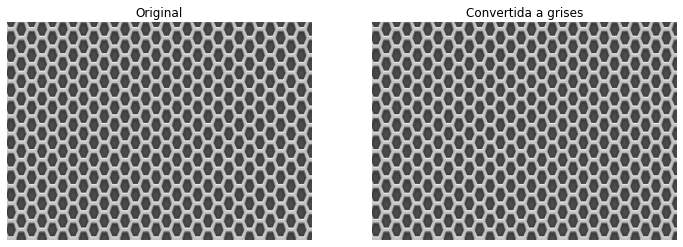

In [2]:
img = cv2.imread("data/metalgrid.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

fig, ax = plt.subplots(1,2,figsize=(12,4)) 
ax[0].set_title("Original")
ax[0].imshow(img,aspect='auto')
ax[0].axis('off')
ax[1].set_title("Convertida a grises")
ax[1].imshow(gray,aspect='auto',cmap='gray', vmin=0, vmax=255)
ax[1].axis('off')
plt.show()

#### Punto 1 Gradiente de la Imagen

In [3]:
def gradient(img):
    """Devuelve el gradiente de una imagen en dos arrays: magnitud y ángulo en grados.
    """
    # Aplicamos Sobelx en 'float32' y luego convertimos de nuevo a 8-bit para evitar overflow
    sobelx_64 = cv2.Sobel(img,cv2.CV_32F,1,0,ksize=3)
    absx_64 = np.absolute(sobelx_64)
    sobelx_8u1 = absx_64/absx_64.max()*255
    sobelx_8u = np.uint8(sobelx_8u1)

    # De igual modo para Sobely
    sobely_64 = cv2.Sobel(img,cv2.CV_32F,0,1,ksize=3)
    absy_64 = np.absolute(sobely_64)
    sobely_8u1 = absy_64/absy_64.max()*255
    sobely_8u = np.uint8(sobely_8u1)

    # De los gradiente calculamos Magnitud y lo pasamos a 8-bit (Opcional)
    mag = np.hypot(sobelx_8u, sobely_8u)
    mag = mag/mag.max()*255
    mag = np.uint8(mag)

    # Encontramos la Dirección y la pasamos a grados
    theta = np.arctan2(sobely_64, sobelx_64)
    angle = np.rad2deg(theta)
    return mag,angle

#### Punto 2 Módulo y ángulo del gradiente

- El gráfico 1) muestra la magnitud del gradiente de 0 a 255, representando como negro 0 y como blanco 255.
- El gráfico 2) cofifica los grados usando azul para los negativos próximos a -180 y rojo para los positivos próximos a 180.

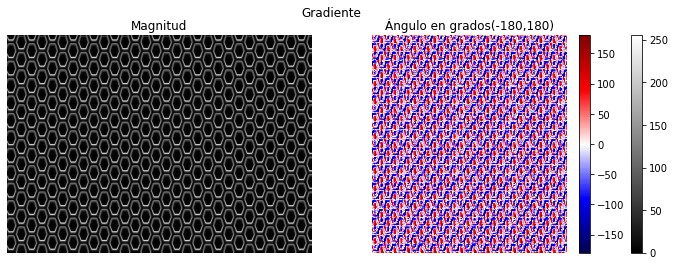

In [4]:
mag,angle = gradient(gray)
fig, ax = plt.subplots(1,2,figsize=(12,4)) 
fig.suptitle("Gradiente")
im0 = ax[0].imshow(mag,aspect='auto',cmap=cm.gray, vmin=0, vmax=255.0)
ax[0].set_title("Magnitud")
ax[0].axis('off')
plt.colorbar(im0)
im1 = ax[1].imshow(angle,aspect='auto',cmap=cm.seismic, vmin=-180.0, vmax=180.0)
ax[1].set_title("Ángulo en grados(-180,180)")
ax[1].axis('off')
plt.colorbar(im1)
plt.show()

#### Punto 3 Detección de bordes

La siguiente función colorea los bordes de una imagen restringiendo el gradiente a los ángulos ingresados (expresados en grados y que superen un umbral de activación).

In [5]:
def plot_with_colored_angles(img,initial_angle,angle_span=45.0,mag_threeshold = 100.0,color=(255,0,0),alpha=0.95):
    """
    img: imagen de entrada (puede ser RGB)
    initial_angle: angulo inicial en grados (-180,180)
    angle_span: apertura en grados
    mag_threeshold: umbral de magnitud a partir del cúal considerar que es un borde.
    color: color RGB para colorear bordes (R,G,B)
    alpha: transparencia del fondo  (1.0=Opaco,0.0=Sin fondo)
    """
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    mag,angle = gradient(gray)        
    end_angle = initial_angle + angle_span
    
    angle_mask = (angle >= initial_angle) & (angle <= end_angle) 
    mag_mask = mag >= mag_threeshold
    img_colored = img.copy()
    img_colored[angle_mask&mag_mask] = color
    img_colored[~(angle_mask&mag_mask),1] = img[~(angle_mask&mag_mask),1]*alpha
    img_colored[~(angle_mask&mag_mask),2] = img[~(angle_mask&mag_mask),2]*alpha
        
    plt.figure(figsize=(16,12))
    plt.imshow(img_colored,aspect='auto', interpolation='nearest')
    plt.title(f"Ángulos de {initial_angle} a {end_angle} c/ umbral de magnitud {mag_threeshold}")
    plt.axis('off')
    plt.show()

#### 3.1 Borde superior

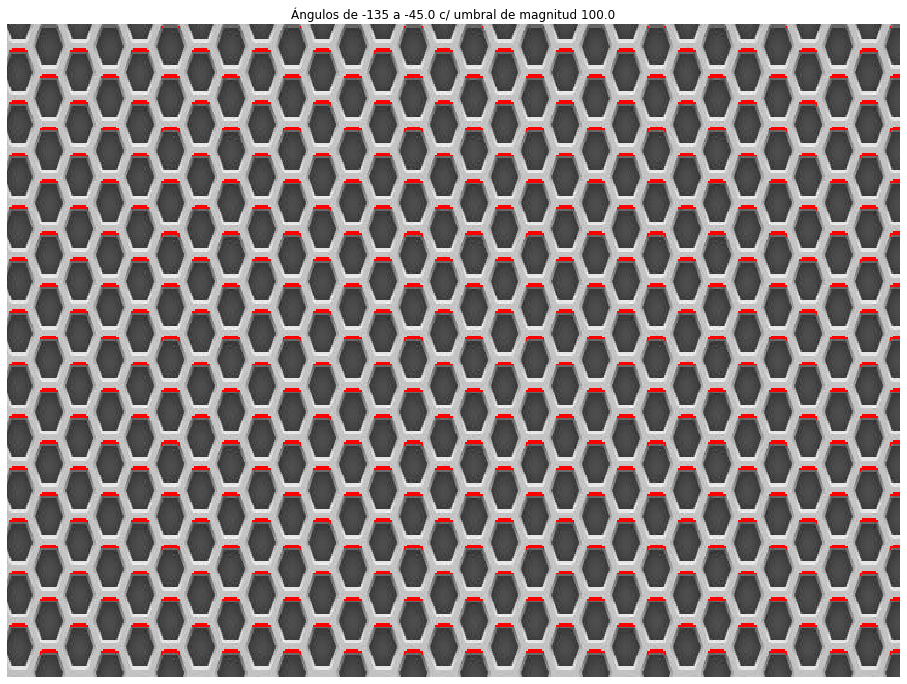

In [6]:
plot_with_colored_angles(img,initial_angle=-180+1*45,angle_span=90.0,
                         mag_threeshold=100.0,color=(255,0,0),alpha=1.0)

#### 3.2 Borde superior derecho

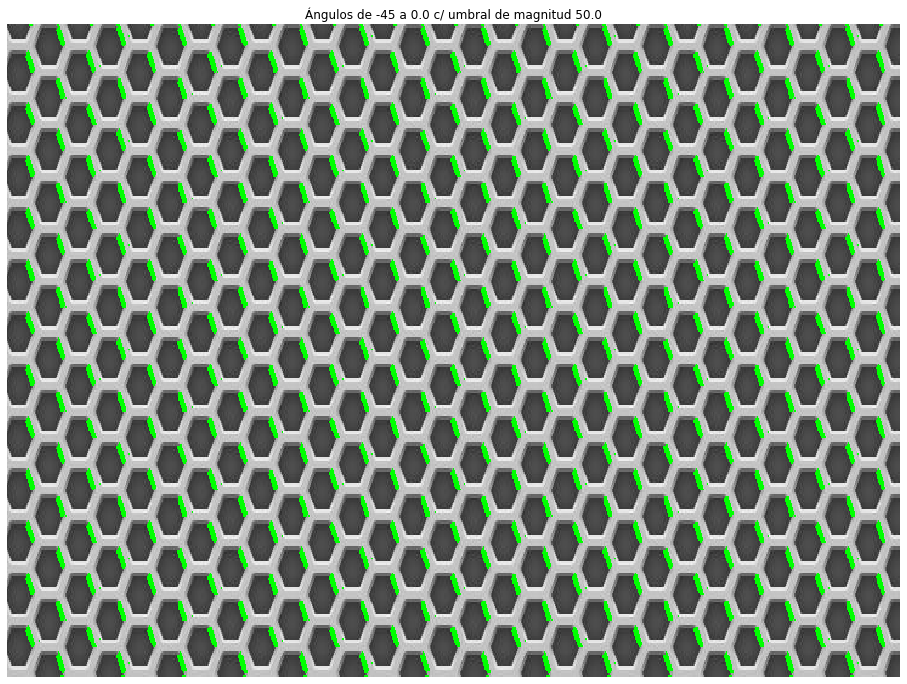

In [7]:
plot_with_colored_angles(img,initial_angle=-180+3*45,angle_span=45.0,
                         mag_threeshold=50.0,color=(0,255,0),alpha=1.0)

#### 3.3 Borde inferior derecho

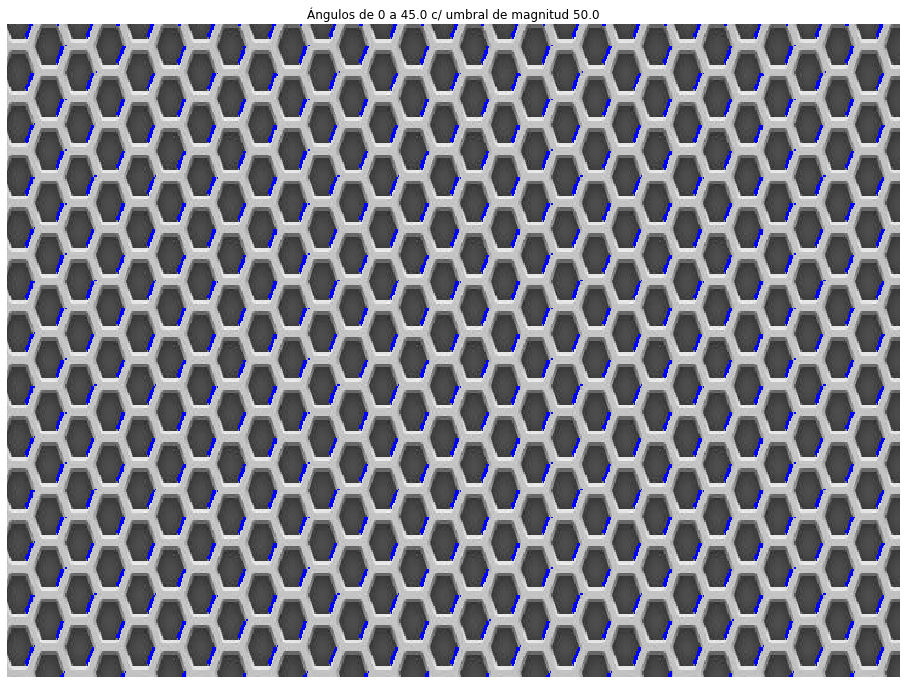

In [8]:
plot_with_colored_angles(img,initial_angle=-180+4*45,angle_span=45.0,
                         mag_threeshold=50.0,color=(0,0,255),alpha=1.0)

#### 3.4 Borde inferior 

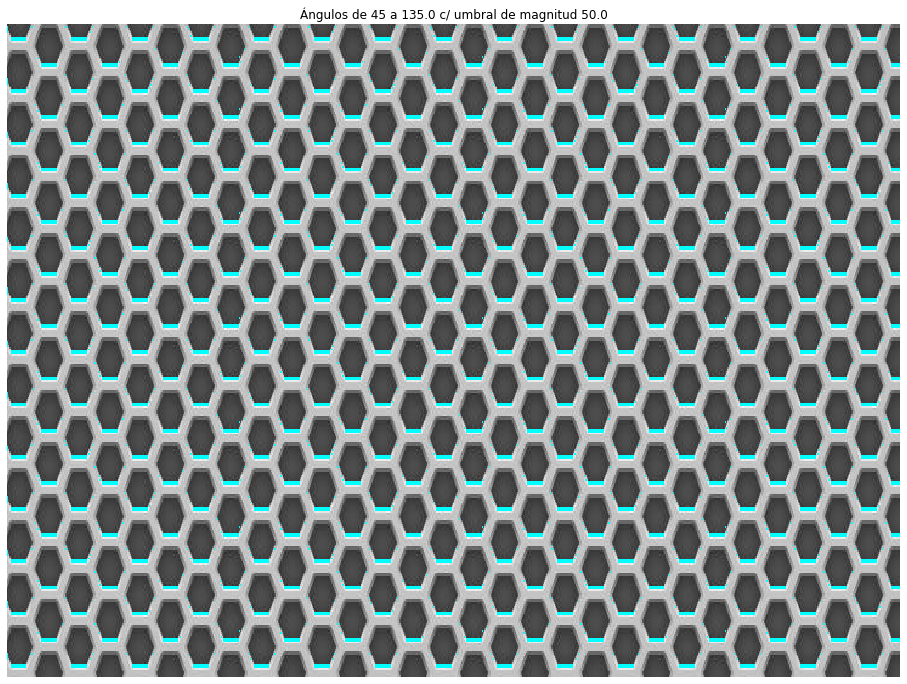

In [9]:
plot_with_colored_angles(img,initial_angle=-180+5*45,angle_span=90.0,
                         mag_threeshold=50.0,color=(0,255,255),alpha=1.0)

#### 3.5 Borde inferior izquierdo

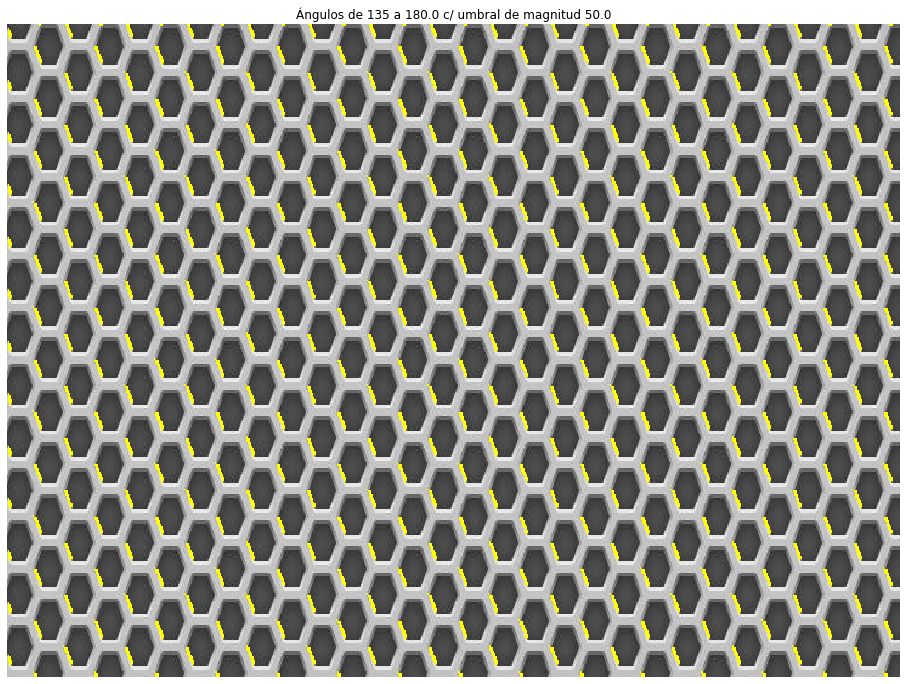

In [10]:
plot_with_colored_angles(img,initial_angle=180-1*45,angle_span=45.0,
                         mag_threeshold=50.0,color=(255,255,0),alpha=1.0)

#### 3.6 Borde superior izquierdo

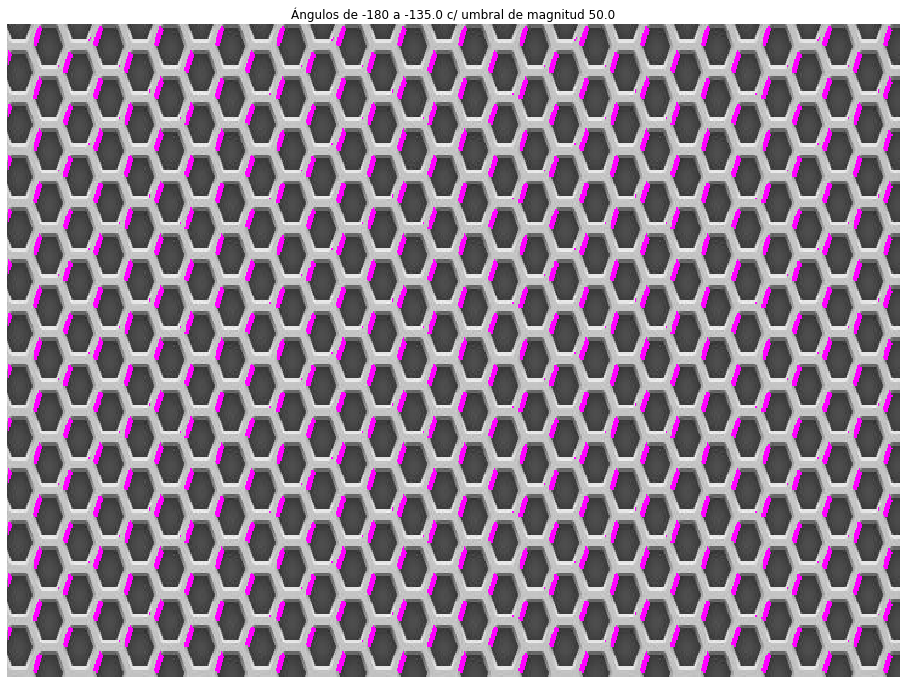

In [11]:
plot_with_colored_angles(img,initial_angle=-180-0*45,angle_span=45.0,
                         mag_threeshold=50.0,color=(255,0,255),alpha=1.0)

#### Pruebas con imagen con bordes menos determinados

In [12]:
img2 = cv2.imread("data/tela2.jpg")

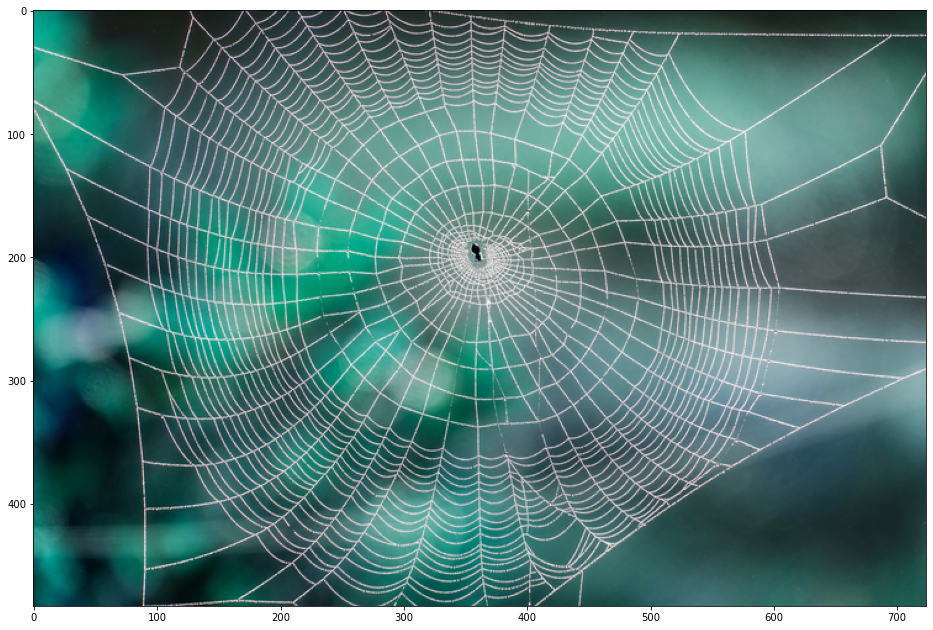

In [13]:
plt.figure(figsize=(16,12))
plt.imshow(img2)
plt.show()

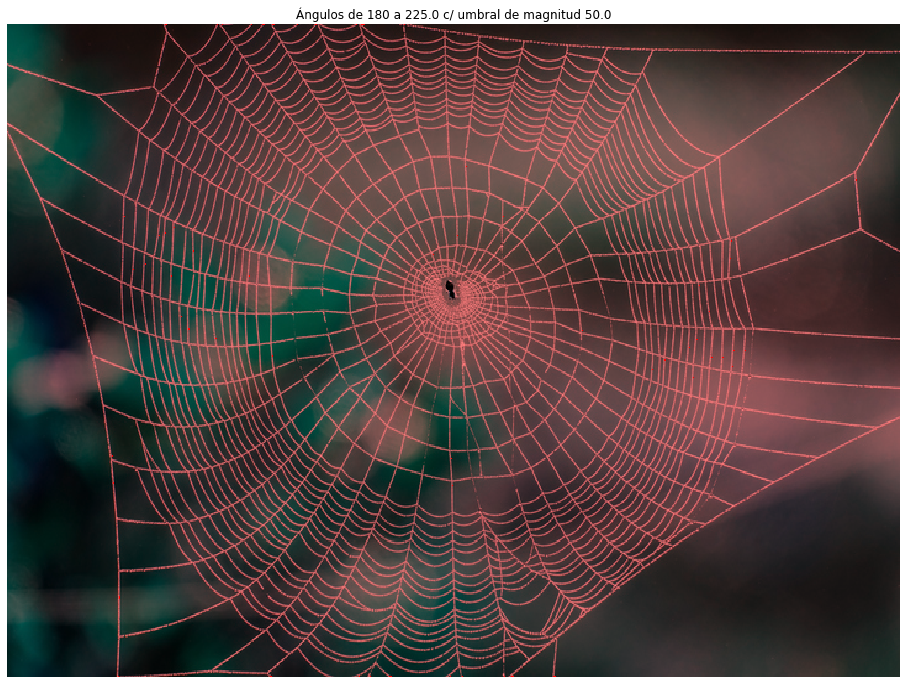

In [14]:
plot_with_colored_angles(img2,initial_angle=180-0,angle_span=45.0,
                         mag_threeshold=50.0,color=(255,0,0),alpha=0.5)

Canny?